## Visualization file for ZeroShot and Mallet

In [1]:
import pandas as pd
import sys
import os

# Add the parent directory of 'src' to the path
sys.path.append(os.path.abspath(".."))
import numpy as np
from scipy.sparse import csr_matrix, vstack
import pyLDAvis as vis
from src.metrics.coherence import *


In [2]:
def read_ZS(path_ZS):
    '''
    Returns a dictionary for the pyLDAvis module.
    Takes the path to the parent folder ZS_results (path_ZS)
    and searches the parameters inside ZS_output.
    '''
    input_path = os.path.join(path_ZS, '')
    
    if not os.path.exists(input_path):
        raise Exception('Path not found in PC!')

    else:
        search_items={
            'betas':['betas.npy','topic_term_dists'],
            'thetas':['thetas.npy', 'doc_topic_dists'],
            'doc_len':['doc_len.npy', 'doc_lengths'],
            'term_freq':['term_freq.npy', 'term_frequency']
        }
        results = {}

        for item in search_items:
            doc = np.load(os.path.join(input_path, search_items[item][0]))
            results.update({search_items[item][1]:doc})


        vocab_path = os.path.join(input_path, 'vocab.txt')
        with open(vocab_path, 'r', encoding='utf-8') as f:
            vocab = [line.strip() for line in f.readlines()]

        results['vocab'] = vocab 

    return results

In [3]:
def read_mallet(path_mallet):
    '''
    Returns a dictionary for the pyLDAvis module.
    Takes the path to the parent folder mallet_folder (path_mallet)
    and searches the parameters inside mallet_output.
    '''
    input_path = os.path.join(path_mallet, 'mallet_output')
    
    if not os.path.exists(input_path):
        raise Exception('Path not found in PC!')

    else:
        search_items={
            'betas_en':['betas_ES.npy','topic_term_dists_en'],
            'betas_es':['betas_ES.npy','topic_term_dists_es'],
            'thetas_en':['thetas_ES.npz', 'doc_topic_dists_en'],
            'thetas_es':['thetas_ES.npz', 'doc_topic_dists_es'],
        }
        results = {}

        for item in search_items:
            doc = np.load(os.path.join(input_path, search_items[item][0]))
            results.update({search_items[item][1]:doc})

        #in order to get the doc-topic we have to transform back from -npz
        #to a matrix format, we do it in this lines
        aux = results['doc_topic_dists_en']
        #Reshaping of the auxiliar variable
        dense_vec_en = csr_matrix((aux['data'], aux['indices'], aux['indptr']), shape=aux['shape'])
        results['doc_topic_dists_en'] = dense_vec_en.toarray()

        #Reshaping of the auxiliar variable
        dense_vec_es = csr_matrix((aux['data'], aux['indices'], aux['indptr']), shape=aux['shape'])
        results['doc_topic_dists_es'] = dense_vec_es.toarray()

        doc_topic_matrix = vstack([dense_vec_en, dense_vec_es])

        # Convert to dense
        results['doc_topic_dists'] = doc_topic_matrix.toarray()

        #Get the vocab and frequency, both stored in vocab.txt
        vocab_path = os.path.join(input_path, 'vocab_EN.txt')
        vocab_df = pd.read_csv(vocab_path, sep='\t', header = None)
        results['vocab_en'] = vocab_df[0]
        results['term_frequency_en'] = vocab_df[1] 

        vocab_path = os.path.join(input_path, 'vocab_ES.txt')
        vocab_df = pd.read_csv(vocab_path, sep='\t', header = None)
        results['vocab_es'] = vocab_df[0]
        results['term_frequency_es'] = vocab_df[1] 

        #Error, estas simplemente sumando 1 en todos los topic_lengths
        results['doc_lengths_en'] = np.round(results['doc_topic_dists_en'].sum(axis=1)).astype(int)
        results['doc_lengths_es'] = np.round(results['doc_topic_dists_es'].sum(axis=1)).astype(int)
        print(np.round(results['doc_topic_dists_en'].sum(axis=1)).astype(int))
        results['doc_lengths'] = np.round(results['doc_topic_dists'].sum(axis=1)).astype(int)





    return results

In [7]:
def apply_to_topickeys_in_subdirs(parent_dir):
	"""
	Lists all subdirectories in parent_dir and applies function F to 'topickeys.txt' in each subdirectory.
	Returns a dictionary mapping subdirectory names to the result of F, or None if the file does not exist.
	"""
	results = {}
	for subdir in os.listdir(parent_dir):
		subdir_path = os.path.join(parent_dir, subdir)
		if os.path.isdir(subdir_path):
			file_path = os.path.join(subdir_path, 'mallet_output/en/topickeys.txt')
			if os.path.isfile(file_path):
				results[subdir] = extract_cohr(file_path)
			else:
				results[subdir] = None
	return results

In [5]:
def zs_apply_to_topickeys_in_subdirs(parent_dir):
	"""
	Lists all subdirectories in parent_dir and applies function F to 'topickeys.txt' in each subdirectory.
	Returns a dictionary mapping subdirectory names to the result of F, or None if the file does not exist.
	"""
	results = {}
	for subdir in os.listdir(parent_dir):
		subdir_path = os.path.join(parent_dir, subdir)
		if os.path.isdir(subdir_path):
			file_path = os.path.join(subdir_path, 'ZS_output/topics.txt')
			if os.path.isfile(file_path):
				results[subdir] = extract_cohr(file_path)
			else:
				results[subdir] = None
	return results

In [8]:
res = apply_to_topickeys_in_subdirs('/export/usuarios_ml4ds/ammesa/LDA_folder/LDA_micro_sports_Dataset'); res

Coherence per topic: [0.4834980485900827, 0.4939801439741789, 0.2919082714973741, 0.4113544727250358, 0.18982567892611504, 0.4303251044278137]
Average coherence: 0.38348195335676666
Coherence per topic: [0.3012360724558877, 0.47415977478708815, 0.4004986068458164, 0.45901509703894217, 0.4164375104423219, 0.4203236593586839, 0.36095143882495306, 0.39372527483670594, 0.2761925092622405, 0.24373427377925702, 0.5471966707153532, 0.42991218324868574, 0.1773391419599669, 0.3414826931885878, 0.4073001886087437, 0.5017155968066839, 0.22395377607197284, 0.4578605968082406, 0.6330652543055184, 0.48686827367553115]
Average coherence: 0.397648429651059
Coherence per topic: [0.5009558313289283, 0.3458967869713778, 0.49376555716451886, 0.3899531219124598, 0.44030084432087707, 0.2761925092622404, 0.5755189649116571, 0.4278652523841239, 0.48686827367553115, 0.39878184626505403, 0.3176928028969685, 0.06659111603062365]
Average coherence: 0.39336524226036335
Coherence per topic: [0.3414826931885878, 0.5

{'n_topics_6_old': None,
 'n_topics_6': 0.38348195335676666,
 'n_topics_20': 0.397648429651059,
 'n_topics_12': 0.39336524226036335,
 'n_topics_15': 0.37188912105078864,
 'n_topics_50': 0.3831793445354779,
 'n_topics_30': 0.3848914638603303,
 'n_topics_12_old': None,
 'n_topics_9': 0.4014263255413013}

In [35]:
res = zs_apply_to_topickeys_in_subdirs('/export/usuarios_ml4ds/ammesa/ZS_results/en_2025-06-04_segmented_dataset.parquet.gzip'); res

Coherence per topic: [0.33853531262957526, 0.18550228627774623, 0.41810966240707714, 0.12684959365123874, 0.24791951484654745, 0.1, 0.6631041130208789, 0.41621495006072384, 0.029647282854050105]
Average coherence: 0.28065363508309304
Coherence per topic: [0.13127372273261123, 0.10005238033243802, 0.676565144215293, 0.12679677021566674, 0.0980978604898115, 0.13855371365786134, 0.23816280831531075, 0.17297048601842618, 0.12505484729611105, 0.37926229445267723, 0.3997178546278384, 0.30681858060917894]
Average coherence: 0.24111053858026865
Coherence per topic: [0.5348962311904124, 0.37792832482374755, 0.0968827795765094, 0.08986577810718424, 0.1084223701095953, 0.49745487085588336, 0.12403123364930764, 0.13347377127141744, 0.349251253128627, 0.4764701132560954, 0.1748061559047823, 0.2014128046265098, 0.36896132433820616, 0.037866780502451146, 0.3217478840425073, 0.1485594781188401, 0.29698450570933266, 0.4634646458064305, 0.059205371649193525, 0.47506463965048285]
Average coherence: 0.266

{'n_topics_9': 0.28065363508309304,
 'n_topics_12': 0.24111053858026865,
 'n_topics_20': 0.2668375158158758,
 'n_topics_50': 0.2801457784852479,
 'n_topics_15': 0.2615435728422391,
 'n_topics_6': 0.2680923172069188,
 'n_topics_30': 0.24355906310662911}

In [9]:
n_topics_arr

NameError: name 'n_topics_arr' is not defined

In [10]:
# Remove entries with value None and extract number of topics from the key
filtered = {k: v for k, v in res.items() if v is not None}
n_topics_arr = np.array([int(k.split('_')[2]) for k in filtered.keys()])
coherence_arr = np.array(list(filtered.values()))
coherence_arr

array([0.38348195, 0.39764843, 0.39336524, 0.37188912, 0.38317934,
       0.38489146, 0.40142633])

In [52]:
vis_inputs = read_mallet('/export/usuarios_ml4ds/ammesa/mallet_folder/en_2025-06-04_segm_trans/n_topics_50')

visuals = vis.prepare(topic_term_dists=vis_inputs['topic_term_dists_en'],
                      doc_topic_dists=vis_inputs['doc_topic_dists_en'],
                      doc_lengths=vis_inputs['doc_lengths_en'],
                      vocab=vis_inputs['vocab_en'],
                      term_frequency=vis_inputs['term_frequency_en'])
vis.display(visuals)


[0 0 0 ... 0 0 0]


ValidationError: 
 * Number of terms in vocabulary does not match the number of columns of topic_term_dists (where each row of topic_term_dists is a probability distribution of terms for a given topic)
 * Not all rows (distributions) in doc_topic_dists sum to 1.

In [7]:
vis.save_html(visuals, 'mallet_en.html')


In [8]:
visuals = vis.prepare(topic_term_dists=vis_inputs['topic_term_dists_es'],
                      doc_topic_dists=vis_inputs['doc_topic_dists_es'],
                      doc_lengths=vis_inputs['doc_lengths_es'],
                      vocab=vis_inputs['vocab_es'],
                      term_frequency=vis_inputs['term_frequency_es'])
vis.display(visuals)



/export/usuarios_ml4ds/ammesa/TFG-LLMs/.venv_vis/lib/python3.12/site-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
/export/usuarios_ml4ds/ammesa/TFG-LLMs/.venv_vis/lib/python3.12/site-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
/export/usuarios_ml4ds/ammesa/TFG-LLMs/.venv_vis/lib/python3.12/site-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


In [11]:
vis.save_html(visuals, 'mallet_es.html')


In [38]:
vis_inputs_zs = read_ZS('/export/usuarios_ml4ds/ammesa/ZS_results/micro_sports_Dataset/n_topics_9/ZS_output')
visuals = vis.prepare(topic_term_dists=vis_inputs_zs['topic_term_dists'],
                      doc_topic_dists=vis_inputs_zs['doc_topic_dists'],
                      doc_lengths=vis_inputs_zs['doc_lengths'],
                      vocab=vis_inputs_zs['vocab'],
                      term_frequency=vis_inputs_zs['term_frequency'])
vis.display(visuals)

/export/usuarios_ml4ds/ammesa/TFG-LLMs/.venv_idx/lib/python3.12/site-packages/joblib/externals/loky/backend/fork_exec.py:38: DeprecationWarning: This process (pid=882864) is multi-threaded, use of fork() may lead to deadlocks in the child.
  pid = os.fork()
/export/usuarios_ml4ds/ammesa/TFG-LLMs/.venv_idx/lib/python3.12/site-packages/joblib/externals/loky/backend/fork_exec.py:38: DeprecationWarning: This process (pid=882864) is multi-threaded, use of fork() may lead to deadlocks in the child.
  pid = os.fork()
/export/usuarios_ml4ds/ammesa/TFG-LLMs/.venv_idx/lib/python3.12/site-packages/joblib/externals/loky/backend/fork_exec.py:38: DeprecationWarning: This process (pid=882864) is multi-threaded, use of fork() may lead to deadlocks in the child.
  pid = os.fork()
/export/usuarios_ml4ds/ammesa/TFG-LLMs/.venv_idx/lib/python3.12/site-packages/joblib/externals/loky/backend/fork_exec.py:38: DeprecationWarning: This process (pid=882864) is multi-threaded, use of fork() may lead to deadlocks 

In [39]:
vis.save_html(visuals, 'ctm.html')



ValueError: x, y, and format string must not be None

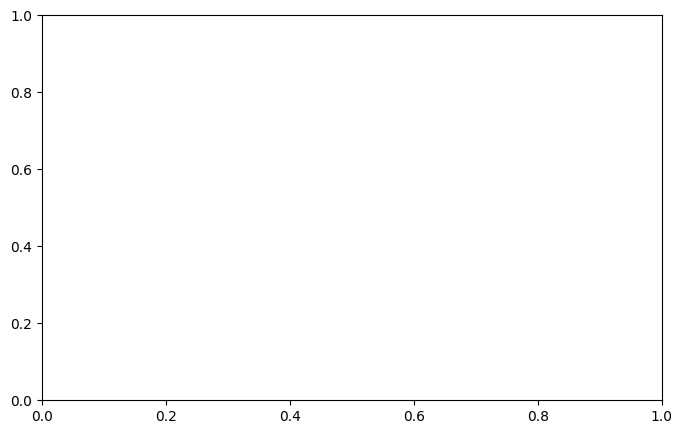

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


# Plot
plt.figure(figsize=(8, 5))
plt.plot(n_topics_arr, coherence_arr, marker='o', color='b', label='Topic Coherence')
plt.xlabel('Number of Topics (k)')
plt.ylabel('Avg Topic Coherence')
plt.title('Avg Topic Coherence vs. Number of Topics')
plt.grid(True)
plt.legend()
plt.show()
